# Analyze the usage.csv in this folder

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## data description

df2 usage_cpu_e3_t25_main.csv: CPU only transforms

df3 usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU

df4 data/usage_cpu_torch_empty_cuda_e3_t25.csv: Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations

df5 data/usage_GPU_transforms_e5_little_cpu_transfer.csv

df6 All transforms are done on the GPU and no transfer on the CPU is done..

Further descriptions are on notion!

Missing:
3) Debug batch data and see where else data might be on the GPU..


What did not work:

- deletion of all non relevant entries in the batch data - apparently they are not the problem..
- 

In [2]:
# location = 'data/2_usage.csv' #df1
# location = 'data/usage_cpu_e3_t25_main.csv' #df2
# location = 'data/usage_e3_t25_gpu_transforms.csv' #df3
# location = 'data/usage_cpu_torch_empty_cuda_e3_t25.csv' #df4
# location = 'data/usage_GPU_transforms_e5_little_cpu_transfer.csv' #df5
# location = 'data/usage_all_on_gpu_e_3.csv' #df6
location = 'data/37_usage.csv'
# location2 = 'data/16_usage.csv'
# location = 'data/17_usage.csv'
df = pd.read_csv(location) 

In [3]:
print(df.describe())

       device  context  gpu util (%)  memory util (%)  total memory (MB)  \
count  2474.0      0.0   2474.000000      2474.000000             2474.0   
mean      0.0      NaN      0.457094         0.216637            49140.0   
std       0.0      NaN      0.388538         0.200396                0.0   
min       0.0      NaN      0.000000         0.000000            49140.0   
25%       0.0      NaN      0.110000         0.010000            49140.0   
50%       0.0      NaN      0.300000         0.130000            49140.0   
75%       0.0      NaN      1.000000         0.490000            49140.0   
max       0.0      NaN      1.000000         0.520000            49140.0   

       free memory (MB)  used memory (MB)  memory reserved by torch (MB)  \
count       2474.000000       2474.000000                    2474.000000   
mean       31251.189976      17888.810024                    6738.969281   
std        11415.648387      11415.648387                    6194.403682   
min        

In [4]:
df["time"] = pd.to_datetime(df["time"])

In [5]:
# gpu_util = df.loc[:,"gpu util (%)"].rolling(10).sum()  / 10
# gpu_util.plot(subplots=True, figsize=(15,2),ylim=(0,1))

In [6]:
# memory_util = df.loc[:,"memory util (%)"].rolling(10).sum()  / 10
# memory_util.plot(subplots=True, figsize=(15,2),ylim=(0,1))

In [7]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [8]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))
divisor = df.shape[0] / 5
print(divisor)

494.8


In [9]:
divisor = int(df.shape[0] / 10)
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(divisor).sum()  / divisor

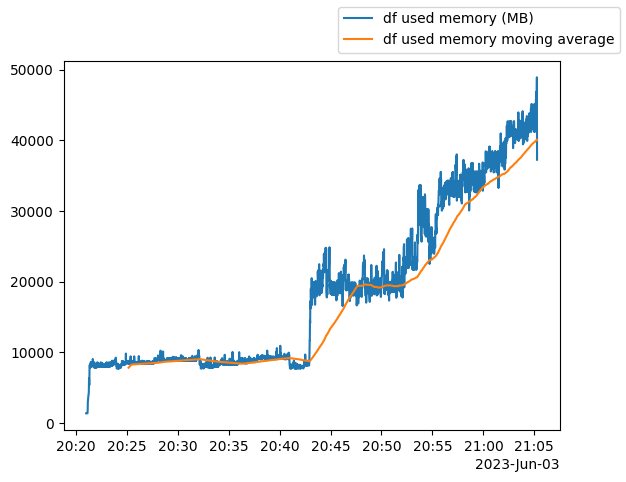

In [10]:
plot, ax = plt.subplots()
from_tick = 0
to_tick = df.shape[0]
for i in ("used memory (MB)","used memory moving average"):
    ax.plot(df.loc[from_tick:to_tick, 'time'], df.loc[from_tick:to_tick, i], label=f"df {i}")
    # ax.plot(df2.loc[from_tick:to_tick, 'time'], df2.loc[from_tick:to_tick, i], label=f"df2 {i}")
    
plot.legend()

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

In [11]:
df.columns
print(df.shape[0])
print(df.loc[df.shape[0]-1:, 'time'])
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

2474
2473   2023-06-03 21:05:16
Name: time, dtype: datetime64[ns]


In [12]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.loc[df.shape[0]-100:, "utilization"])

KeyError: 'utilization'